In [1]:
import matplotlib.pyplot as plt
import numpy as np

from EISfit.circuits import Randles, DefineCircuit
from EISfit.preprocessing import read_Gamry

In [2]:
# read data
data = read_Gamry('Chalco-in-buffer-50mV.DTA')
# print(data)

[6.32425678e+02 3.58024958e+03 7.17645533e-10 3.60616694e+04
 6.34278718e+01]


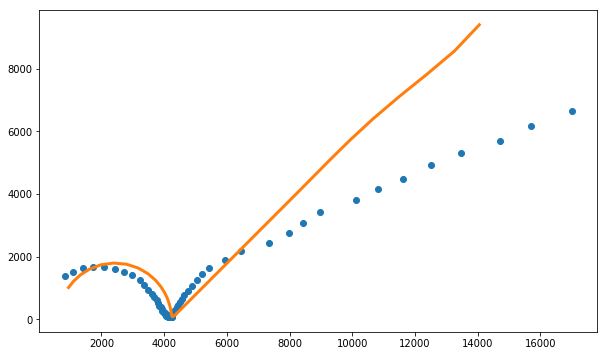

In [50]:
# instantiate the circuit and fit it to the data
circuit = DefineCircuit(initial_guess=[.01, .005, .1, .9, .0001], circuit='R_0-p(R_1,C_1)-W_1/W_2')

# circuit = Randles(initial_guess=[.01, .005, .1, .9, .0001, 500], CPE=True)
circuit.fit(np.array(data[0]),np.array(data[1]))
Z_fit = circuit.predict(np.array(data[0]))
print(circuit.parameters_)

# plot the data and the fit
fig, ax = plt.subplots(figsize=(10,10))
Z = np.array(data[1])
ax.plot(np.real(Z), -np.imag(Z), 'o')
ax.plot(np.real(Z_fit), -np.imag(Z_fit), lw=3)
ax.set_aspect('equal')

plt.show()